In [71]:
import numpy as np
import matplotlib.pyplot as plt

In [72]:
"""
Código para calcular la separación de equilibrio r_0, la energía de cohesión U por átomo y módulo de compresión de gases nobles solidificados B
"""

EPS = 0.0001
N_max = 40
h = 0.001
sigma = [2.74,3.40,3.65,3.98] # Armstrongs
epsilon = [0.0031,0.0104,0.140,0.0200]
gas = ['Neón (Ne)','Argón (Ar)','Kriptón (Kr)','Xenón (Xe)']
r_min = 2.5 # Armstrongs
r_max = 3.5 # Armstrongs

# Definimos las sumas parciales A_n:

def sum_par(n,m):
  aux = 0
  sum_parcial = 0
  for i in range(-n,n):
    for j in range(-n,n):
      for k in range(-n,n):
        if not (i == 0 and j == 0 and k == 0):
          aux = i*i+j*j+k*k+i*j+i*k+j*k
          sum_parcial+=aux**(-0.5*m)
  return sum_parcial

# Definimos las sumas sobre la red:

def sum_red(m):
  sum = 0
  n = 1
  eps = 1.e30
  aux = sum_par(1,m)
  while eps > EPS:
    n+=1
    if n == N_max:
      print(f'Finaliza la iteración en N=({n})')
    else:
      sum = sum_par(n,m)
      eps = abs(sum-aux)
      aux = sum
  return sum

# Definimos la energía de cohesión por átomo:

def U(e,s,a6,a12,r):
  aux6 = 0
  aux12 = 0
  if abs(r)<1.e-4:
    print(f'Seleccione un valor mayor para',r)
  else:
    aux6 = (s/r)**6
    aux12 = (s/r)**12
  return 2*e*(a12*aux12 - a6*aux6)

# Calculamos la separación de equilibrio:

def rmin(e,s,a6,a12,a,b):
  n = 0
  eps = b - a
  r1 = a + 0.334*eps
  r2 = a + 0.667*eps
  while eps>EPS:
    n+=1
    if n == N_max:
      print(f'Finaliza la iteración en N=({n})')
    if U(e,s,a6,a12,r1) > U(e,s,a6,a12,r2):
      a = r1
    else:
      b = r2
    eps = b - a
    r1 = a + eps/3
    r2 = a + 2*eps/3
  return a + 0.5*eps

print(f'RESULTADOS:')
a_6 = sum_red(6)
print(f'A_6=',a_6)
a_12 = sum_red(12)
print(f'A_12=',a_12)
for i in range(4):
  r0 = rmin(epsilon[i],sigma[i],a_6,a_12,r_min,r_max)  #Separación de equilibrio
  u_c = U(epsilon[i],sigma[i],a_6,a_12,r0)  #Energía de cohesión por átomo en equilibrio
  du2 = (U(epsilon[i],sigma[i],a_6,a_12,r0+h) + U(epsilon[i],sigma[i],a_6,a_12,r0-h) - 2*u_c)/(h**2)
  b0 = (np.sqrt(2)*du2)/(9*r0)  #Módulo de compresión del gas en equilibrio
  print(f'Gas noble:', gas[i])
  print(f'Separación de equilibrio (en Armstrongs):', r0)
  print(f'Energía de cohesión por átomo (en eV):', u_c)
  print(f'Módulo de compresión:',160*b0)
  print(f'-------------------------------------------------')

RESULTADOS:
A_6= 14.453339638720719
A_12= 12.131877877789682
Gas noble: Neón (Ne)
Separación de equilibrio (en Armstrongs): 2.987073518598663
Energía de cohesión por átomo (en eV): -0.026689478259371454
Módulo de compresión: 1.812946328517685
-------------------------------------------------
Gas noble: Argón (Ar)
Separación de equilibrio (en Armstrongs): 3.499955492158346
Energía de cohesión por átomo (en eV): -0.07442317719589982
Módulo de compresión: 10.08212534139716
-------------------------------------------------
Gas noble: Kriptón (Kr)
Separación de equilibrio (en Armstrongs): 3.499955492158346
Energía de cohesión por átomo (en eV): 0.4154240585720868
Módulo de compresión: 386.03505790880877
-------------------------------------------------
Gas noble: Xenón (Xe)
Separación de equilibrio (en Armstrongs): 3.499955492158346
Energía de cohesión por átomo (en eV): 1.0188812630331883
Módulo de compresión: 176.78034743291852
-------------------------------------------------


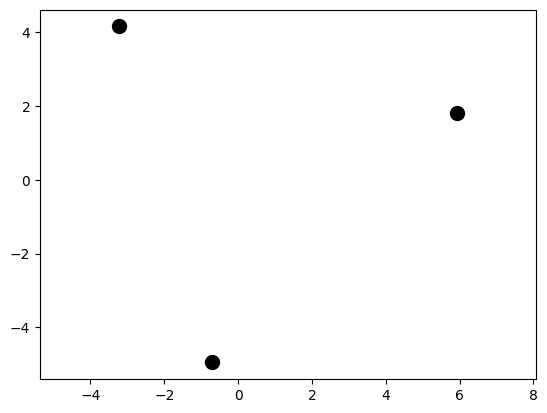

Umin = -0.009299917843287637


In [69]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Constants
eps = 0.0031  # for Neon in eV
sig = 2.74  # in Angstroms

# Number of particles and dimensions
num_particles = 3
nd = 2

# Initial guess for positions
r_guess = np.array([[0, 0], [1, 0], [1, 1]])

# Flatten r_guess
r_guess = r_guess.flatten()

# Minimize function
def LJ_funNd(r):
    r = r.reshape((num_particles, nd))  # Reshape r back to its original shape
    U_LJ = 0.0
    sig12 = sig ** 12
    sig6 = sig ** 6
    for i in range(num_particles - 1):
        for j in range(i + 1, num_particles):
            rij = np.sum((r[i] - r[j]) ** 2) ** 0.5
            U_LJ += sig12 / (rij ** 6) - sig6 / (rij ** 3)
    U_LJ = 4 * eps * U_LJ
    return U_LJ

# Minimize the function
res = minimize(LJ_funNd, r_guess)

# Get the new positions
rnew = res.x.reshape((num_particles, nd))

# Plot the final positions
plt.figure()
for i in range(num_particles):
    plt.plot(rnew[i, 0], rnew[i, 1], 'ko', markersize=10, markerfacecolor='k')
plt.axis('equal')
plt.show()

# Print the minimum potential
print('Umin =', res.fun)
